In [1]:
# Cargar dependencias.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

# Clustering.
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import OneHotEncoder

# Normalizar.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import silhouette_score

# Graficar en 3D.
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (12, 5)
plt.style.use('ggplot')


In [2]:
# Subir el dataset.
from google.colab import files
import io

uploaded = files.upload()
Base_de_datos = pd.read_csv(io.BytesIO(uploaded["CollegeScorecard.csv"]))

Saving CollegeScorecard.csv to CollegeScorecard.csv


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [50]:
Instituciones_activas=Base_de_datos[Base_de_datos.CURROPER==1]

In [97]:
base_datos2 = Instituciones_activas[['INSTNM','HIGHDEG','DISTANCEONLY','TUITFTE','ADM_RATE_ALL','NPT4_PUB','NPT4_PRIV']].copy()


In [98]:
base_datos2.head()

,INSTNM,HIGHDEG,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PUB,NPT4_PRIV
0,Alabama A & M University,4,0.0,9063.0,0.8989,13415.0,NaN
1,University of Alabama at Birmingham,4,0.0,9033.0,0.8673,14805.0,NaN
2,Amridge University,4,0.0,12057.0,NaN,NaN,7455.0
3,University of Alabama in Huntsville,4,0.0,8322.0,0.8062,17520.0,NaN
4,Alabama State University,4,0.0,7813.0,0.5125,11936.0,NaN


<function matplotlib.pyplot.show(*args, **kw)>

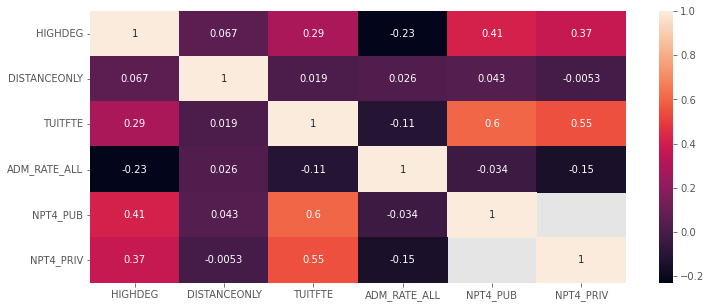

In [100]:

matriz1=base_datos2.drop(columns=['INSTNM'])
matrix = matriz1.corr()
sb.heatmap(matrix, annot=True)
plt.show



     


In [101]:
base_datos2["HIGHDEG"].replace(0, " Non-degree-granting", inplace=True)
base_datos2["HIGHDEG"].replace(1, " Certificate degree", inplace=True)
base_datos2["HIGHDEG"].replace(2, " Associate degree", inplace=True)
base_datos2["HIGHDEG"].replace(3, " Bachelor's degree", inplace=True)
base_datos2["HIGHDEG"].replace(4, " Graduate degree", inplace=True)


In [102]:
base_datos2["ADM_RATE_ALL"].replace("", np.nan , inplace=True)

In [113]:
base_definitiva=pd.get_dummies(base_datos2, columns=["HIGHDEG"])

In [115]:
base_definitiva

,INSTNM,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PUB,NPT4_PRIV,HIGHDEG_ Associate degree,HIGHDEG_ Bachelor's degree,HIGHDEG_ Certificate degree,HIGHDEG_ Graduate degree,HIGHDEG_ Non-degree-granting
0,Alabama A & M University,0.0,9063.0,0.8989,13415.0,NaN,0,0,0,1,0
1,University of Alabama at Birmingham,0.0,9033.0,0.8673,14805.0,NaN,0,0,0,1,0
2,Amridge University,0.0,12057.0,NaN,NaN,7455.0,0,0,0,1,0
3,University of Alabama in Huntsville,0.0,8322.0,0.8062,17520.0,NaN,0,0,0,1,0
4,Alabama State University,0.0,7813.0,0.5125,11936.0,NaN,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
7799,Georgia Military College-Columbus Campus,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
7800,Georgia Military College-Valdosta Campus,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
7801,Georgia Military College-Warner Robins Campus,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
7802,Georgia Military College-Online,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1


In [128]:
# Instituciones publicas
base_definitiva_publica=base_definitiva.drop(columns=['NPT4_PRIV'])
base_definitiva_publica_def=base_definitiva.drop(columns=['NPT4_PRIV','INSTNM'])
base_definitiva_publica_definitiva=base_definitiva_publica_def.dropna()
base_definitiva_publica_definitiva_normalizada=(base_definitiva_publica_definitiva-base_definitiva_publica_definitiva.min())/(base_definitiva_publica_definitiva.max()-base_definitiva_publica_definitiva.min())

In [129]:
base_definitiva_publica_definitiva_normalizada

,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PUB,HIGHDEG_ Associate degree,HIGHDEG_ Bachelor's degree,HIGHDEG_ Certificate degree,HIGHDEG_ Graduate degree,HIGHDEG_ Non-degree-granting
0,0.0,0.120307,0.882932,0.504422,0.0,0.0,0.0,1.0,0.0
1,0.0,0.119902,0.846341,0.555010,0.0,0.0,0.0,1.0,0.0
3,0.0,0.110304,0.775591,0.653820,0.0,0.0,0.0,1.0,0.0
4,0.0,0.103433,0.435503,0.450595,0.0,0.0,0.0,1.0,0.0
5,0.0,0.162628,0.496874,0.777414,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
7255,0.0,0.024326,0.548634,0.481202,0.0,0.0,0.0,0.0,1.0
7322,0.0,0.117661,0.317161,0.121665,0.0,0.0,0.0,1.0,0.0
7323,0.0,0.035004,0.361510,0.345525,0.0,1.0,0.0,0.0,0.0
7370,0.0,0.053971,0.548634,0.545147,0.0,0.0,0.0,1.0,0.0


In [130]:
# Dataset normalizado para correrlo en la curva de codo.
X1 = base_publica_definitiva_normalizada

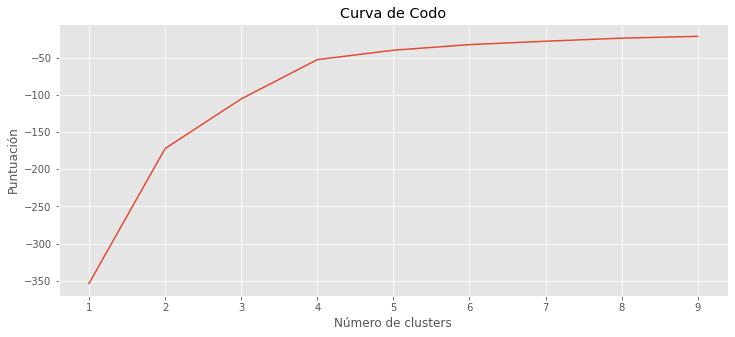

In [131]:
# Curva de Codo
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X1).score(X1) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación')
plt.title('Curva de Codo')
plt.show()

Se usara un k=4

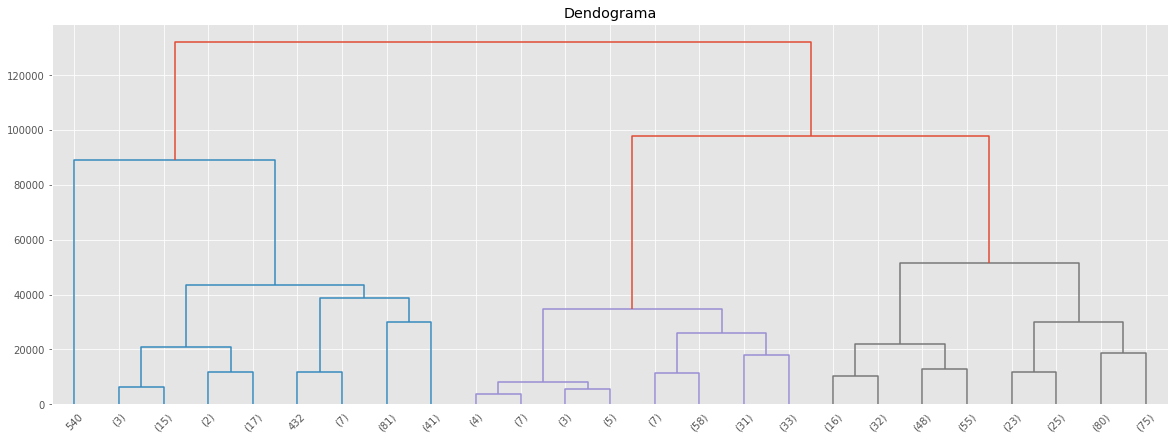

In [132]:
dendro1=base_definitiva_publica_definitiva
plt.figure(figsize=(20,7))
plt.title('Dendograma')
dend=sch.dendrogram(sch.linkage(dendro1,method='ward'),truncate_mode='level',p=4)

In [133]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
ayuda=cluster.fit(base_definitiva_publica_definitiva_normalizada)
labels_2D=ayuda.labels_

In [140]:
base_definitiva_publica=base_definitiva_publica.dropna()

In [141]:
model=AgglomerativeClustering(n_clusters=4, linkage='ward')

data_fit_3=model.fit(base_definitiva_publica_definitiva_normalizada)
lab_3c=data_fit_3.labels_


In [142]:
base_definitiva_publica

,INSTNM,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PUB,HIGHDEG_ Associate degree,HIGHDEG_ Bachelor's degree,HIGHDEG_ Certificate degree,HIGHDEG_ Graduate degree,HIGHDEG_ Non-degree-granting
0,Alabama A & M University,0.0,9063.0,0.8989,13415.0,0,0,0,1,0
1,University of Alabama at Birmingham,0.0,9033.0,0.8673,14805.0,0,0,0,1,0
3,University of Alabama in Huntsville,0.0,8322.0,0.8062,17520.0,0,0,0,1,0
4,Alabama State University,0.0,7813.0,0.5125,11936.0,0,0,0,1,0
5,The University of Alabama,0.0,12198.0,0.5655,20916.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
7255,Ukiah Adult School,0.0,1953.0,0.6102,12777.0,0,0,0,0,1
7322,Georgia Regents University,0.0,8867.0,0.4103,2898.0,0,0,0,1,0
7323,Middle Georgia State College,0.0,2744.0,0.4486,9049.0,0,1,0,0,0
7370,University of North Georgia,0.0,4149.0,0.6102,14534.0,0,0,0,1,0


In [143]:

base_definitiva_publica['Labels_3Clusters']=lab_3c
base_definitiva_publica.describe()


,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PUB,HIGHDEG_ Associate degree,HIGHDEG_ Bachelor's degree,HIGHDEG_ Certificate degree,HIGHDEG_ Graduate degree,HIGHDEG_ Non-degree-granting,Labels_3Clusters
count,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000
mean,0.001493,6755.289552,0.676840,13001.528358,0.068657,0.111940,0.094030,0.719403,0.005970,0.529851
std,0.038633,4374.553357,0.177501,4275.718912,0.253058,0.315529,0.292088,0.449627,0.077093,0.941410
min,0.000000,151.000000,0.136400,-445.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4485.250000,0.565250,10339.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6074.000000,0.680050,13259.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,8225.250000,0.819875,15861.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,74228.000000,1.000000,27032.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [144]:
#Grupo 0
print("GRUPO 0:")
is_G=base_definitiva_publica.loc[:, 'Labels_3Clusters']==0
C3_G=base_definitiva_publica[is_G]
base_01 = pd.DataFrame(C3_G)
base_01



GRUPO 0:


,INSTNM,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PUB,HIGHDEG_ Associate degree,HIGHDEG_ Bachelor's degree,HIGHDEG_ Certificate degree,HIGHDEG_ Graduate degree,HIGHDEG_ Non-degree-granting,Labels_3Clusters
0,Alabama A & M University,0.0,9063.0,0.8989,13415.0,0,0,0,1,0,0
1,University of Alabama at Birmingham,0.0,9033.0,0.8673,14805.0,0,0,0,1,0,0
3,University of Alabama in Huntsville,0.0,8322.0,0.8062,17520.0,0,0,0,1,0,0
4,Alabama State University,0.0,7813.0,0.5125,11936.0,0,0,0,1,0,0
5,The University of Alabama,0.0,12198.0,0.5655,20916.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6031,Arizona State University-Downtown Phoenix,0.0,11815.0,0.7626,12403.0,0,0,0,1,0,0
7185,Pennsylvania State University-World Campus,1.0,6355.0,0.6488,18165.0,0,0,0,1,0,0
7322,Georgia Regents University,0.0,8867.0,0.4103,2898.0,0,0,0,1,0,0
7370,University of North Georgia,0.0,4149.0,0.6102,14534.0,0,0,0,1,0,0


In [145]:
base_01.describe()

,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PUB,HIGHDEG_ Associate degree,HIGHDEG_ Bachelor's degree,HIGHDEG_ Certificate degree,HIGHDEG_ Graduate degree,HIGHDEG_ Non-degree-granting,Labels_3Clusters
count,482.000000,482.000000,482.000000,482.000000,482.0,482.0,482.0,482.0,482.0,482.0
mean,0.002075,7448.338174,0.671928,13648.724066,0.0,0.0,0.0,1.0,0.0,0.0
std,0.045549,3281.299537,0.170883,3818.430055,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,1217.000000,0.180000,2035.000000,0.0,0.0,0.0,1.0,0.0,0.0
25%,0.000000,5209.250000,0.565675,11299.250000,0.0,0.0,0.0,1.0,0.0,0.0
50%,0.000000,6644.500000,0.681450,13803.500000,0.0,0.0,0.0,1.0,0.0,0.0
75%,0.000000,9161.750000,0.805200,16101.250000,0.0,0.0,0.0,1.0,0.0,0.0
max,1.000000,24891.000000,1.000000,27032.000000,0.0,0.0,0.0,1.0,0.0,0.0


In [146]:
#Grupo 1
print("GRUPO 1:")
is_G=base_definitiva_publica.loc[:, 'Labels_3Clusters']==1
C3_G=base_definitiva_publica[is_G]
base_011 = pd.DataFrame(C3_G)
base_011

GRUPO 1:


,INSTNM,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PUB,HIGHDEG_ Associate degree,HIGHDEG_ Bachelor's degree,HIGHDEG_ Certificate degree,HIGHDEG_ Graduate degree,HIGHDEG_ Non-degree-granting,Labels_3Clusters
1385,Washburn Institute of Technology,0.0,1192.0,0.7923,12285.0,0,0,1,0,0,1
1649,Assabet Valley Regional Technical School,0.0,11463.0,0.5098,15976.0,0,0,1,0,0,1
1681,Diman Regional Technical Institute,0.0,5816.0,0.3433,13641.0,0,0,1,0,0,1
1764,Southeastern Technical Institute,0.0,3833.0,0.6604,8688.0,0,0,1,0,0,1
2041,Grand River Technical School,0.0,3723.0,1.0000,698.0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5545,Vinal Technical High School,0.0,4093.0,1.0000,17265.0,0,0,0,0,1,1
5562,Orleans Niagara BOCES-Practical Nursing Program,0.0,6858.0,1.0000,12224.0,0,0,1,0,0,1
6268,Escuela De Troqueleria Y Herramentaje,0.0,973.0,0.8605,328.0,0,0,1,0,0,1
7242,Carthage R9 School District-Carthage Technical...,0.0,3295.0,0.7143,10875.0,0,0,1,0,0,1


In [147]:
base_011.describe()

,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PUB,HIGHDEG_ Associate degree,HIGHDEG_ Bachelor's degree,HIGHDEG_ Certificate degree,HIGHDEG_ Graduate degree,HIGHDEG_ Non-degree-granting,Labels_3Clusters
count,67.0,67.000000,67.000000,67.000000,67.0,67.0,67.000000,67.0,67.000000,67.0
mean,0.0,6200.835821,0.681158,13292.895522,0.0,0.0,0.940299,0.0,0.059701,1.0
std,0.0,9084.257561,0.247701,4923.274117,0.0,0.0,0.238721,0.0,0.238721,0.0
min,0.0,443.000000,0.136400,328.000000,0.0,0.0,0.000000,0.0,0.000000,1.0
25%,0.0,2875.000000,0.500000,10885.500000,0.0,0.0,1.000000,0.0,0.000000,1.0
50%,0.0,4728.000000,0.714300,12963.000000,0.0,0.0,1.000000,0.0,0.000000,1.0
75%,0.0,7094.000000,0.912800,16421.000000,0.0,0.0,1.000000,0.0,0.000000,1.0
max,0.0,74228.000000,1.000000,23325.000000,0.0,0.0,1.000000,0.0,1.000000,1.0


In [148]:
#Grupo 2
print("GRUPO 2:")
is_G=base_definitiva_publica.loc[:, 'Labels_3Clusters']==2
C3_G=base_definitiva_publica[is_G]
base_021 = pd.DataFrame(C3_G)
base_021

GRUPO 2:


,INSTNM,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PUB,HIGHDEG_ Associate degree,HIGHDEG_ Bachelor's degree,HIGHDEG_ Certificate degree,HIGHDEG_ Graduate degree,HIGHDEG_ Non-degree-granting,Labels_3Clusters
197,University of Arkansas-Fort Smith,0.0,2204.0,0.5736,6727.0,0,1,0,0,0,2
609,Fort Lewis College,0.0,5566.0,0.8750,14398.0,0,1,0,0,0,2
875,Abraham Baldwin Agricultural College,0.0,2104.0,0.7090,9477.0,0,1,0,0,0,2
901,College of Coastal Georgia,0.0,2420.0,0.8221,11144.0,0,1,0,0,0,2
926,Gordon State College,0.0,1896.0,0.4529,8798.0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
4299,University of Puerto Rico-Ponce,0.0,957.0,0.6398,7714.0,0,1,0,0,0,2
4442,New College of Florida,0.0,2783.0,0.6061,10015.0,0,1,0,0,0,2
5581,Nevada State College,0.0,3347.0,0.5037,11319.0,0,1,0,0,0,2
6498,University of Minnesota-Rochester,0.0,15445.0,0.4455,16992.0,0,1,0,0,0,2


In [149]:
base_021.describe()

,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PUB,HIGHDEG_ Associate degree,HIGHDEG_ Bachelor's degree,HIGHDEG_ Certificate degree,HIGHDEG_ Graduate degree,HIGHDEG_ Non-degree-granting,Labels_3Clusters
count,75.0,75.000000,75.000000,75.000000,75.0,75.0,75.0,75.0,75.0,75.0
mean,0.0,5336.240000,0.672485,11836.760000,0.0,1.0,0.0,0.0,0.0,2.0
std,0.0,3199.444305,0.150673,4383.148476,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,516.000000,0.254700,2146.000000,0.0,1.0,0.0,0.0,0.0,2.0
25%,0.0,2981.500000,0.564450,8843.000000,0.0,1.0,0.0,0.0,0.0,2.0
50%,0.0,5566.000000,0.648800,11319.000000,0.0,1.0,0.0,0.0,0.0,2.0
75%,0.0,6941.500000,0.814300,14971.500000,0.0,1.0,0.0,0.0,0.0,2.0
max,0.0,15445.000000,1.000000,22976.000000,0.0,1.0,0.0,0.0,0.0,2.0


In [150]:
#Grupo 3
print("GRUPO 3:")
is_G=base_definitiva_publica.loc[:, 'Labels_3Clusters']==3
C3_G=base_definitiva_publica[is_G]
base_031 = pd.DataFrame(C3_G)
base_031

GRUPO 3:


,INSTNM,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PUB,HIGHDEG_ Associate degree,HIGHDEG_ Bachelor's degree,HIGHDEG_ Certificate degree,HIGHDEG_ Graduate degree,HIGHDEG_ Non-degree-granting,Labels_3Clusters
34,Marion Military Institute,0.0,2443.0,0.6034,11013.0,1,0,0,0,0,3
181,University of Arkansas Community College-Morri...,0.0,1708.0,0.5838,6770.0,1,0,0,0,0,3
1558,Eastern Maine Community College,0.0,1154.0,0.6639,8924.0,1,0,0,0,0,3
1570,Northern Maine Community College,0.0,554.0,0.6810,11881.0,1,0,0,0,0,3
2019,Pearl River Community College,0.0,763.0,0.8566,573.0,1,0,0,0,0,3
2150,Highlands College of Montana Tech,0.0,3512.0,0.8891,9648.0,1,0,0,0,0,3
2205,Nebraska College of Technical Agriculture,0.0,2924.0,0.6404,10898.0,1,0,0,0,0,3
2350,New Mexico State University-Dona Ana,0.0,1093.0,0.8520,6197.0,1,0,0,0,0,3
2353,Eastern New Mexico University-Roswell Campus,0.0,1133.0,0.6321,6959.0,1,0,0,0,0,3
2357,New Mexico Military Institute,0.0,7564.0,0.4186,6182.0,1,0,0,0,0,3


In [151]:
base_031.describe()

,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PUB,HIGHDEG_ Associate degree,HIGHDEG_ Bachelor's degree,HIGHDEG_ Certificate degree,HIGHDEG_ Graduate degree,HIGHDEG_ Non-degree-granting,Labels_3Clusters
count,46.0,46.000000,46.000000,46.00000,46.0,46.0,46.0,46.0,46.0,46.0
mean,0.0,2614.586957,0.729117,7694.73913,1.0,0.0,0.0,0.0,0.0,3.0
std,0.0,2249.356457,0.160744,3624.32844,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,151.000000,0.381800,-445.00000,1.0,0.0,0.0,0.0,0.0,3.0
25%,0.0,1149.500000,0.632100,5135.75000,1.0,0.0,0.0,0.0,0.0,3.0
50%,0.0,2278.000000,0.729500,7647.00000,1.0,0.0,0.0,0.0,0.0,3.0
75%,0.0,3102.500000,0.855450,9858.25000,1.0,0.0,0.0,0.0,0.0,3.0
max,0.0,12051.000000,1.000000,17639.00000,1.0,0.0,0.0,0.0,0.0,3.0


In [152]:
#Instituciones privadas
base_privada=base_definitiva.drop(columns=['NPT4_PUB'])
base_privada_def=base_definitiva.drop(columns=['NPT4_PUB','INSTNM'])
base_privada_definitiva=base_privada_def.dropna()
base_privada_definitiva_normalizada=(base_privada_definitiva-base_privada_definitiva.min())/(base_privada_definitiva.max()-base_privada_definitiva.min())

In [153]:
base_privada_definitiva_normalizada

,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PRIV,HIGHDEG_ Associate degree,HIGHDEG_ Bachelor's degree,HIGHDEG_ Certificate degree,HIGHDEG_ Graduate degree,HIGHDEG_ Non-degree-granting
10,0.0,0.193570,0.6422,0.311030,0.0,1.0,0.0,0.0,0.0
13,0.0,0.238977,0.4829,0.313239,0.0,0.0,0.0,1.0,0.0
22,0.0,0.130605,0.7490,0.304374,0.0,1.0,0.0,0.0,0.0
23,0.0,0.147255,0.6279,0.239296,0.0,1.0,0.0,0.0,0.0
30,0.0,0.123757,0.7388,0.230612,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
7364,0.0,0.261388,0.7648,0.201024,0.0,0.0,0.0,1.0,0.0
7365,0.0,0.293277,0.7648,0.268045,0.0,0.0,0.0,1.0,0.0
7367,0.0,0.282891,0.7648,0.257292,0.0,0.0,0.0,1.0,0.0
7368,0.0,0.257461,0.7648,0.236541,0.0,0.0,0.0,1.0,0.0


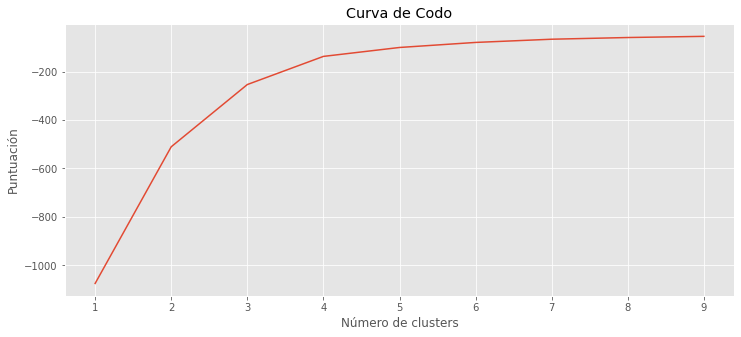

In [154]:
# Dataset normalizado para correrlo en la curva de codo.
X2 = base_privada_definitiva_normalizada
# Curva de Codo
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X2).score(X2) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación')
plt.title('Curva de Codo')
plt.show()

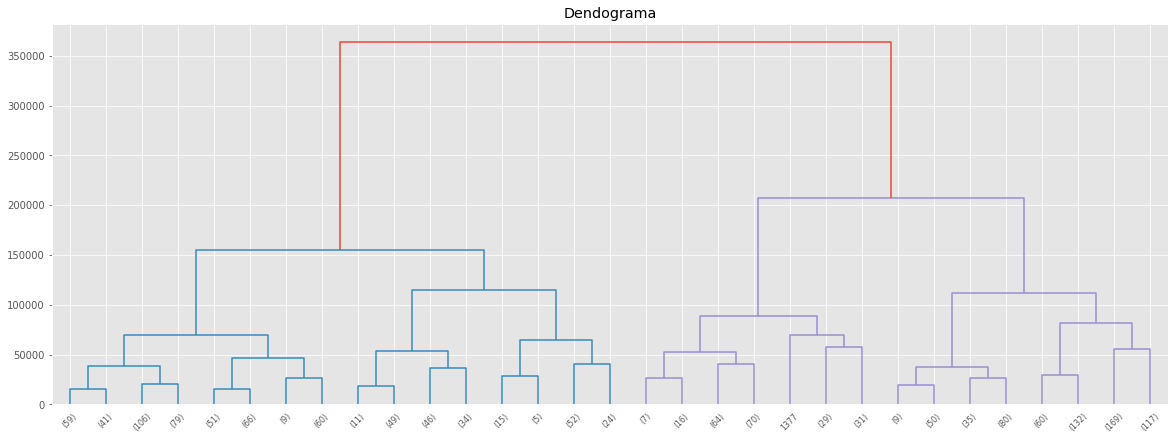

In [155]:
plt.figure(figsize=(20,7))
plt.title('Dendograma')
dend=sch.dendrogram(sch.linkage(base_privada_definitiva.dropna(),method='ward'),truncate_mode='level',p=4)

In [156]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
ayuda=cluster.fit(base_privada_definitiva_normalizada)
labels_2D=ayuda.labels_

In [171]:
base_privada=base_privada.dropna()

In [172]:
base_privada

,INSTNM,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PRIV,HIGHDEG_ Associate degree,HIGHDEG_ Bachelor's degree,HIGHDEG_ Certificate degree,HIGHDEG_ Graduate degree,HIGHDEG_ Non-degree-granting
10,Birmingham Southern College,0.0,11928.0,0.6422,22994.0,0,1,0,0,0
13,South University-Montgomery,0.0,14726.0,0.4829,23152.0,0,0,0,1,0
22,Herzing University-Birmingham,0.0,8048.0,0.7490,22518.0,0,1,0,0,0
23,Huntingdon College,0.0,9074.0,0.6279,17864.0,0,1,0,0,0
30,Judson College,0.0,7626.0,0.7388,17243.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7364,DeVry University-Tennessee,0.0,16107.0,0.7648,15127.0,0,0,0,1,0
7365,DeVry University-Texas,0.0,18072.0,0.7648,19920.0,0,0,0,1,0
7367,DeVry University-Virginia,0.0,17432.0,0.7648,19151.0,0,0,0,1,0
7368,DeVry University-Washington,0.0,15865.0,0.7648,17667.0,0,0,0,1,0


In [159]:
model=AgglomerativeClustering(n_clusters=4, linkage='ward')

data_fit_3=model.fit(base_privada_definitiva_normalizada)
lab_3c=data_fit_3.labels_


In [173]:

base_privada['Labels_3Clusters']=lab_3c
base_privada.describe()


,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PRIV,HIGHDEG_ Associate degree,HIGHDEG_ Bachelor's degree,HIGHDEG_ Certificate degree,HIGHDEG_ Graduate degree,HIGHDEG_ Non-degree-granting,Labels_3Clusters
count,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000
mean,0.002536,15380.639822,0.686787,21421.455929,0.112238,0.269499,0.057070,0.546607,0.014585,1.422321
std,0.050315,6759.162359,0.211099,7013.984700,0.315760,0.443840,0.232051,0.497981,0.119921,0.782394
min,0.000000,0.000000,0.000000,751.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10778.000000,0.550900,17667.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,14698.000000,0.717300,21453.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.000000,19683.000000,0.838800,24893.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000
max,1.000000,61621.000000,1.000000,72265.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [174]:
#Grupo 0
print("GRUPO 0:")
is_G=base_privada.loc[:, 'Labels_3Clusters']==0
C3_G=base_privada[is_G]
base_02 = pd.DataFrame(C3_G)
base_02


GRUPO 0:


,INSTNM,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PRIV,HIGHDEG_ Associate degree,HIGHDEG_ Bachelor's degree,HIGHDEG_ Certificate degree,HIGHDEG_ Graduate degree,HIGHDEG_ Non-degree-granting,Labels_3Clusters
149,Baptist Health Schools-Little Rock,0.0,4199.0,0.8615,15238.0,0,0,1,0,0,0
345,Glendale Career College,0.0,6651.0,1.0000,17305.0,0,0,1,0,0,0
449,North-West College-Pomona,0.0,5273.0,1.0000,20043.0,0,0,1,0,0,0
450,North-West College-West Covina,0.0,5839.0,1.0000,19258.0,0,0,1,0,0,0
451,North-West College-Pasadena,0.0,5084.0,1.0000,18434.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7233,Gemini School of Visual Arts & Communication,0.0,0.0,1.0000,32858.0,0,0,1,0,0,0
7250,Shepherds College,0.0,36858.0,0.7059,5078.0,0,0,1,0,0,0
7265,Lawrence & Company College of Cosmetology,0.0,3806.0,1.0000,5127.0,0,0,0,0,1,0
7274,California Career Institute,0.0,7694.0,0.7895,18152.0,0,0,1,0,0,0


In [175]:
base_02.describe()

,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PRIV,HIGHDEG_ Associate degree,HIGHDEG_ Bachelor's degree,HIGHDEG_ Certificate degree,HIGHDEG_ Graduate degree,HIGHDEG_ Non-degree-granting,Labels_3Clusters
count,113.0,113.000000,113.000000,113.000000,113.0,113.0,113.000000,113.0,113.000000,113.0
mean,0.0,10124.203540,0.788777,18779.159292,0.0,0.0,0.796460,0.0,0.203540,0.0
std,0.0,6802.198895,0.239431,7728.885354,0.0,0.0,0.404424,0.0,0.404424,0.0
min,0.0,0.000000,0.000000,751.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
25%,0.0,5666.000000,0.705900,14797.000000,0.0,0.0,1.000000,0.0,0.000000,0.0
50%,0.0,8663.000000,0.838800,19475.000000,0.0,0.0,1.000000,0.0,0.000000,0.0
75%,0.0,13683.000000,1.000000,22972.000000,0.0,0.0,1.000000,0.0,0.000000,0.0
max,0.0,36858.000000,1.000000,40545.000000,0.0,0.0,1.000000,0.0,1.000000,0.0


In [176]:
#Grupo 1
print("GRUPO 1:")
is_G=base_privada.loc[:, 'Labels_3Clusters']==1
C3_G=base_privada[is_G]
base_012 = pd.DataFrame(C3_G)
base_012

GRUPO 1:


,INSTNM,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PRIV,HIGHDEG_ Associate degree,HIGHDEG_ Bachelor's degree,HIGHDEG_ Certificate degree,HIGHDEG_ Graduate degree,HIGHDEG_ Non-degree-granting,Labels_3Clusters
13,South University-Montgomery,0.0,14726.0,0.4829,23152.0,0,0,0,1,0,1
36,University of Mobile,0.0,10339.0,0.7125,17970.0,0,0,0,1,0,1
41,Oakwood University,0.0,11909.0,0.3435,26954.0,0,0,0,1,0,1
46,Samford University,0.0,17548.0,0.7697,24093.0,0,0,0,1,0,1
51,Spring Hill College,0.0,10653.0,0.4627,18555.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7364,DeVry University-Tennessee,0.0,16107.0,0.7648,15127.0,0,0,0,1,0,1
7365,DeVry University-Texas,0.0,18072.0,0.7648,19920.0,0,0,0,1,0,1
7367,DeVry University-Virginia,0.0,17432.0,0.7648,19151.0,0,0,0,1,0,1
7368,DeVry University-Washington,0.0,15865.0,0.7648,17667.0,0,0,0,1,0,1


In [177]:
base_012.describe()

,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PRIV,HIGHDEG_ Associate degree,HIGHDEG_ Bachelor's degree,HIGHDEG_ Certificate degree,HIGHDEG_ Graduate degree,HIGHDEG_ Non-degree-granting,Labels_3Clusters
count,862.00000,862.000000,862.000000,862.000000,862.0,862.0,862.0,862.0,862.0,862.0
mean,0.00232,15798.883991,0.640196,22163.228538,0.0,0.0,0.0,1.0,0.0,1.0
std,0.04814,6330.564799,0.193668,6819.411575,0.0,0.0,0.0,0.0,0.0,0.0
min,0.00000,370.000000,0.048400,1172.000000,0.0,0.0,0.0,1.0,0.0,1.0
25%,0.00000,11596.250000,0.526175,17997.750000,0.0,0.0,0.0,1.0,0.0,1.0
50%,0.00000,14923.000000,0.665450,21587.500000,0.0,0.0,0.0,1.0,0.0,1.0
75%,0.00000,18950.750000,0.766425,26120.000000,0.0,0.0,0.0,1.0,0.0,1.0
max,1.00000,48657.000000,1.000000,43952.000000,0.0,0.0,0.0,1.0,0.0,1.0


In [178]:
#Grupo 2
print("GRUPO 2:")
is_G=base_privada.loc[:, 'Labels_3Clusters']==2
C3_G=base_privada[is_G]
base_022 = pd.DataFrame(C3_G)
base_022

GRUPO 2:


,INSTNM,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PRIV,HIGHDEG_ Associate degree,HIGHDEG_ Bachelor's degree,HIGHDEG_ Certificate degree,HIGHDEG_ Graduate degree,HIGHDEG_ Non-degree-granting,Labels_3Clusters
10,Birmingham Southern College,0.0,11928.0,0.6422,22994.0,0,1,0,0,0,2
22,Herzing University-Birmingham,0.0,8048.0,0.7490,22518.0,0,1,0,0,0,2
23,Huntingdon College,0.0,9074.0,0.6279,17864.0,0,1,0,0,0,2
30,Judson College,0.0,7626.0,0.7388,17243.0,0,1,0,0,0,2
52,Southeastern Bible College,0.0,10496.0,0.9615,12954.0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
7114,Bais HaMedrash and Mesivta of Baltimore,0.0,26876.0,1.0000,10690.0,0,1,0,0,0,2
7120,Yeshiva Gedolah Zichron Leyma,0.0,4317.0,1.0000,7050.0,0,1,0,0,0,2
7122,Be'er Yaakov Talmudic Seminary,0.0,7935.0,1.0000,7030.0,0,1,0,0,0,2
7277,Yeshiva Gedolah Kesser Torah,0.0,7802.0,1.0000,5260.0,0,1,0,0,0,2


In [179]:
base_022.describe()

,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PRIV,HIGHDEG_ Associate degree,HIGHDEG_ Bachelor's degree,HIGHDEG_ Certificate degree,HIGHDEG_ Graduate degree,HIGHDEG_ Non-degree-granting,Labels_3Clusters
count,425.000000,425.000000,425.000000,425.000000,425.0,425.0,425.0,425.0,425.0,425.0
mean,0.002353,16158.748235,0.699403,20732.922353,0.0,1.0,0.0,0.0,0.0,2.0
std,0.048507,6878.125157,0.213199,6834.936500,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,1539.000000,0.0,1.0,0.0,0.0,0.0,2.0
25%,0.000000,10778.000000,0.581600,17364.000000,0.0,1.0,0.0,0.0,0.0,2.0
50%,0.000000,16157.000000,0.748600,21733.000000,0.0,1.0,0.0,0.0,0.0,2.0
75%,0.000000,21553.000000,0.838800,24111.000000,0.0,1.0,0.0,0.0,0.0,2.0
max,1.000000,44463.000000,1.000000,45774.000000,0.0,1.0,0.0,0.0,0.0,2.0


In [180]:
#Grupo 3
print("GRUPO 3:")
is_G=base_privada.loc[:, 'Labels_3Clusters']==3
C3_G=base_privada[is_G]
base_032 = pd.DataFrame(C3_G)
base_032

GRUPO 3:


,INSTNM,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PRIV,HIGHDEG_ Associate degree,HIGHDEG_ Bachelor's degree,HIGHDEG_ Certificate degree,HIGHDEG_ Graduate degree,HIGHDEG_ Non-degree-granting,Labels_3Clusters
77,Carrington College-Mesa,0.0,13311.0,1.0000,22169.0,1,0,0,0,0,3
78,Carrington College-Tucson,0.0,11942.0,1.0000,21229.0,1,0,0,0,0,3
205,American Academy of Dramatic Arts-Los Angeles,0.0,23029.0,0.2837,41436.0,1,0,0,0,0,3
271,Casa Loma College-Van Nuys,0.0,8512.0,1.0000,25630.0,1,0,0,0,0,3
460,Concorde Career College-San Diego,0.0,6775.0,1.0000,20344.0,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
7095,Golf Academy of America-Farmers Branch,0.0,15738.0,1.0000,21542.0,1,0,0,0,0,3
7177,ITT Technical Institute-West Palm Beach,0.0,11211.0,0.8388,22001.0,1,0,0,0,0,3
7179,ITT Technical Institute-Indianapolis East,0.0,11423.0,0.8388,24751.0,1,0,0,0,0,3
7195,South University-Cleveland,0.0,14995.0,0.4829,23948.0,1,0,0,0,0,3


In [181]:
base_032.describe()

,DISTANCEONLY,TUITFTE,ADM_RATE_ALL,NPT4_PRIV,HIGHDEG_ Associate degree,HIGHDEG_ Bachelor's degree,HIGHDEG_ Certificate degree,HIGHDEG_ Graduate degree,HIGHDEG_ Non-degree-granting,Labels_3Clusters
count,177.000000,177.000000,177.000000,177.000000,177.0,177.0,177.0,177.0,177.0,177.0
mean,0.005650,14831.231638,0.818281,21149.129944,1.0,0.0,0.0,0.0,0.0,3.0
std,0.075165,7019.160331,0.185697,7353.350058,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.200000,1627.000000,1.0,0.0,0.0,0.0,0.0,3.0
25%,0.000000,10058.000000,0.748400,17888.000000,1.0,0.0,0.0,0.0,0.0,3.0
50%,0.000000,13507.000000,0.838800,21299.000000,1.0,0.0,0.0,0.0,0.0,3.0
75%,0.000000,19465.000000,1.000000,23509.000000,1.0,0.0,0.0,0.0,0.0,3.0
max,1.000000,61621.000000,1.000000,72265.000000,1.0,0.0,0.0,0.0,0.0,3.0
